In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.insert(0, '../../../')

from src.difsched.config import getSubAgentConfig, visualizeSubAgentConfig
from src.difsched.env import PolicySimulator, createEnv
from src.difsched.agents.mdp import MdpKernel
from src.difsched.agents.Others import PolicyDemoAdaptiveAlpha

Environment Configuration
Number of Users:        4
Window Length:          200
Dataflow:               thumb_bk
N_aggregation:          4
N_r:                    5
Resource Bar:           5
Bandwidth:              60
Sigmoid K List:         [0.3]
Sigmoid S List:         [10.0]
Random Seed:            999


avg_reward_mdpDeter: 0.22007353729818807


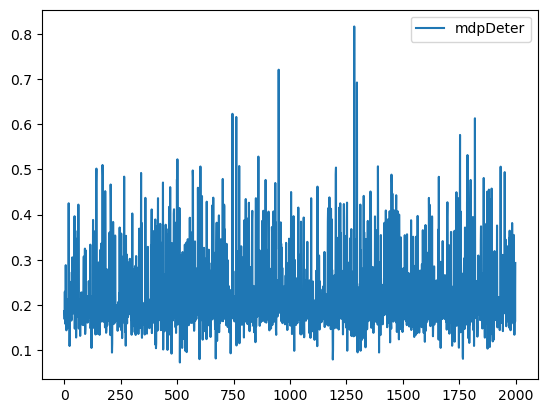

In [3]:
configIdx = 1
subAgentParams = getSubAgentConfig(configIdx)
visualizeSubAgentConfig(subAgentParams)
trafficDataParentPath =  f'../../../data/raw/traffic'
env = createEnv(subAgentParams, trafficDataParentPath)

obvMode = "predicted"
num_windows = 2000
N_episodes = 10

with open(f'../../../data/results/MdpPolicy/mdp_config{configIdx}.pkl', 'rb') as f:
    mdpKernelParams = pickle.load(f)
mdpPolicyDeter = MdpKernel()
mdpPolicyDeter.load_policy(mdpKernelParams, policyMode="deterministic", randomR=False)

policySimulator = PolicySimulator(env)
policySimulator.setupModes(obvMode=obvMode, mode="test", type="data")
# =========== MdpDeter ===========  
policySimulator.loadPolicies([mdpPolicyDeter], [[0,1,2,3]])
simResultMdpDeter = policySimulator.runSimulation(num_windows=num_windows, N_episodes=N_episodes)

print(f"avg_reward_mdpDeter: {np.mean(simResultMdpDeter['rewardRecord'])}")

plt.plot(simResultMdpDeter['rewardRecord'], label="mdpDeter")
plt.legend()
plt.show()

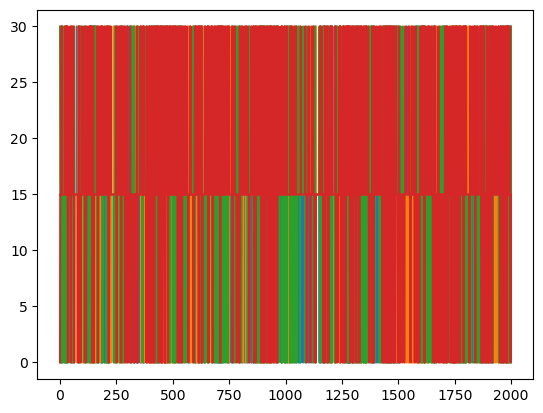

In [4]:
actions = simResultMdpDeter['actionsRecord']

plt.plot(actions)
plt.show()